## Observations and Insights

1. Capomulin and Ramicane seem to be the most promising treatment regimens out of the 10. But despite Ramicane having a lower tumor volume than Capomulin for the lower quartile and medians, Capomulin is the more reliable of the two because its interquartile range is lower than that of Ramicane (7.782 vs 9.099).

2. We can also observe from the scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen that an increased weight is strongly correlated (+0.84) to a higher tumor volume.

3. When plotting timepoint vs tumor volume for the Capomulin treatment regimen it's clear that the relationship between the timepoint and tumor volume can be rather volatile between different mice. Some mice have a rapid decrease in tumor volume towards the beginning of the treatment and others towards the end. This tells us that there may be other factors that determine how rapidly the tumor volume decreases with time in a mouse, such as mouse weight and this can be explored further with more analysis. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
pd.options.display.max_columns = 50

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# mouse_metadata.columns ,study_results.columns
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data_df.head()
# print (pd.options.display.max_columns)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#
# combined_data_df.columns
draft_df = combined_data_df[['Drug Regimen','Tumor Volume (mm3)']]
# draft_df = draft_df.rename(columns={"Tumor Volume (mm3)":"TV(mm3)"})
draft_df
summary_df = draft_df.groupby("Drug Regimen")
mean = summary_df.mean()
median = summary_df.median()
var = summary_df.var()
std = summary_df.std()
sem = summary_df.sem()
sem.columns = ['Tumor Volume (mm3)_SEM']
# sem
sum1 = pd.merge(mean, median, on='Drug Regimen', suffixes=("_Mean","_Med"))
sum1
sum2 = pd.merge(var, std, on='Drug Regimen', suffixes=("_Var","_Std"))
sum3 = pd.merge(sum2, sem, on='Drug Regimen')
summary_stats = pd.merge(sum1, sum3, on='Drug Regimen')
summary_stats

,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Med,Tumor Volume (mm3)_Var,Tumor Volume (mm3)_Std,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


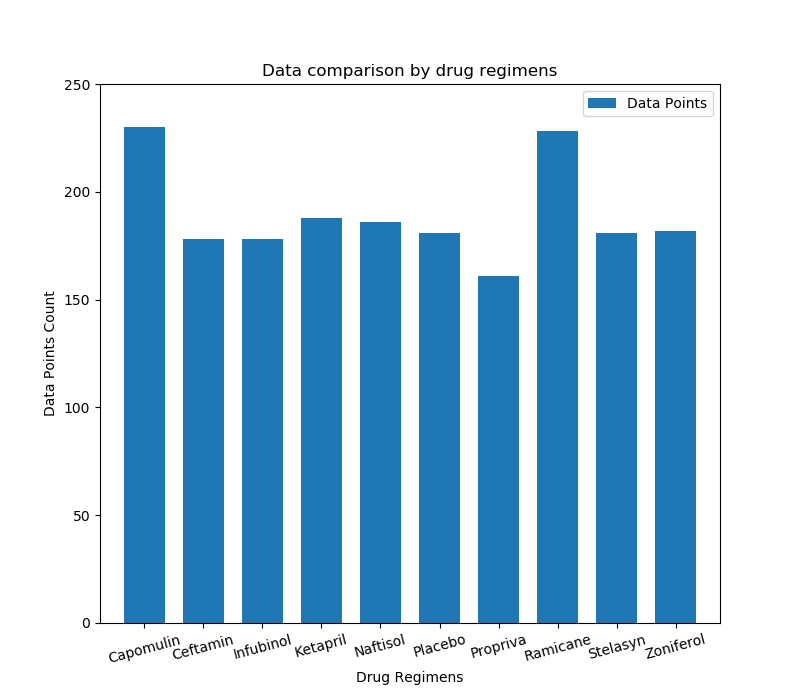

Text(0, 0.5, 'Data Points Count')

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# ax = summary_stats.plot.bar()
regimen_summary = summary_df.count()
regimen_summary.columns = ['Data Points']
regimen_summary

# regimen_max = summary_df.count()['Tumor Volume (mm3)'].max()
# regimen_max
ax=regimen_summary.plot(kind="bar", title='Data comparison by drug regimens', width=0.7, align='center', rot=15, figsize=(8,7) )
# 
# ax.legend(scatterpoints=2, frameon=False, labelspacing=1, bbox_to_anchor=(1, 1), fontsize=8, borderaxespad=0.)
ax.set_ylim(0, regimen_summary['Data Points'].max()+20)
ax.set_xlim(-0.75, len(regimen_summary.index)-.25)
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Data Points Count')

<IPython.core.display.Javascript object>


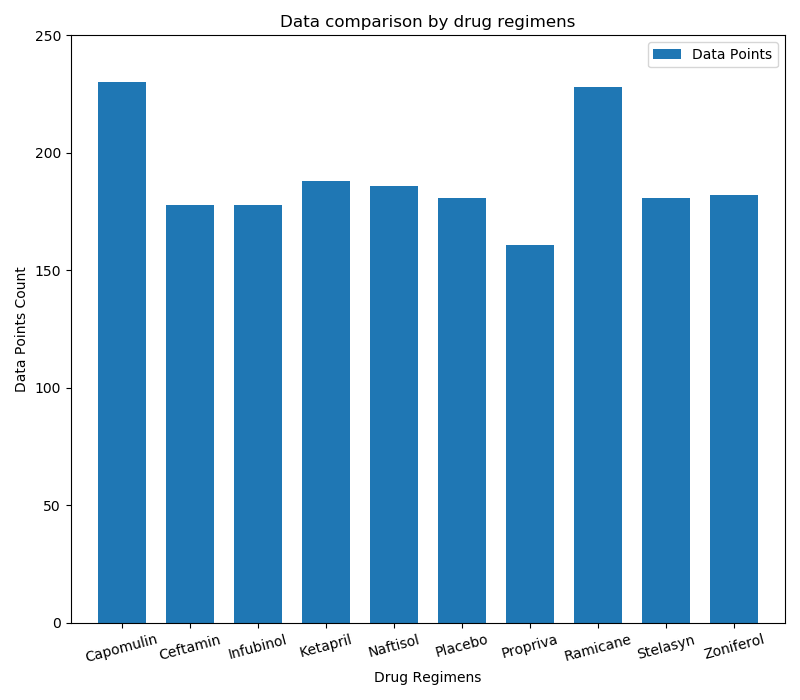

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#
plt.figure(figsize=(8, 7))
bottom = 0

for i in regimen_summary.columns:
    plt.bar(regimen_summary.index, regimen_summary[i], width=0.7, bottom=bottom)
    bottom += regimen_summary[i]

plt.title("Data comparison by drug regimens")
# plt.legend(summary_stats.columns, frameon=False, labelspacing=1, bbox_to_anchor=(1, 1), fontsize=8)
plt.legend(regimen_summary.columns, loc='best')
plt.xticks(rotation=15)
plt.xlabel('Drug Regimens')
plt.ylabel('Data Points Count')
plt.xlim(-0.75, len(regimen_summary.index)-.25)
plt.ylim(0, regimen_summary['Data Points'].max()+20)
plt.tight_layout()
plt.show()

## Pie plots

In [5]:
#
# Generate a pie plot showing the distribution of female versus male mice using pandas
#
draft_df = mouse_metadata[["Sex","Mouse ID"]]
draft_df2 = draft_df.groupby('Sex').count()
# draft_df2
val = pd.Series(draft_df2["Mouse ID"])
val

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


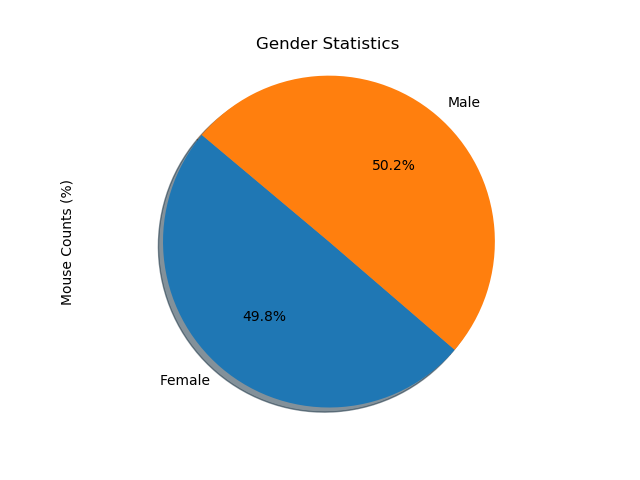

In [6]:
fig = plt.figure()
sp = val.plot(kind="pie", y=val ,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
sp.set_title("Gender Statistics")
sp.set_ylabel("Mouse Counts (%)")
plt.show()
# # male_pie = fig.add_axes([0, 0, .5, .5], aspect=1)
# # male_pie = male_stats.plot(kind="pie", y=male_stats.values)
# # male_pie.legend(scatterpoints=2, frameon=False, labelspacing=1, bbox_to_anchor=(1, 1), fontsize=8, borderaxespad=0.)
# # male_pie.set_title("Male Statistics")
# # male_pie.set_ylabel("Regimen Stats")
# # female_pie = fig.add_axes([.5, .0, .5, .5], aspect=1)
# # female_pie = female_stats.plot(kind="pie", y=female_stats.values)
# # female_pie.set_title("Female Statistics")


<IPython.core.display.Javascript object>


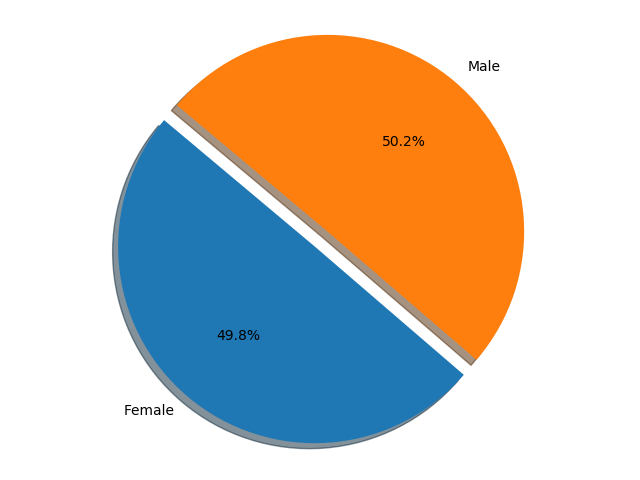

In [7]:
#
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#
# fig, (male,female) = plt.subplots(1,2,figsize=(4,4))

fig = plt.figure()
explode = (0.1,0)
plt.pie(val.values, explode=explode, labels=val.index, autopct="%1.1f%%", shadow=True, startangle=140)
# plt.legend(val.index)
# male2 = fig.add_subplot(331)
# male2.pie(male_stats.values, startangle=140)
# # male2.legend(summary_stats.columns, frameon=False, labelspacing=1, bbox_to_anchor=(1, 1), fontsize=8)
# plt.title('Male Statistics')

# female2 = fig.add_subplot(332)
# female2.pie(female_stats.values, startangle=140)
# plt.title("Female Statistics")
# female2.legend(summary_stats.columns, frameon=False, labelspacing=1, bbox_to_anchor=(1, 1), fontsize=8)

plt.show()
plt.axis("equal")
plt.tight_layout()


## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#
#     finding out final tumor volume for each mouse....
#
stg_df = combined_data_df[['Mouse ID','Timepoint','Drug Regimen','Tumor Volume (mm3)']]
stg_df2 = stg_df[['Mouse ID','Timepoint']]
max_tp = pd.DataFrame(stg_df2.groupby(['Mouse ID'])['Timepoint'].max())
# max_tp
merged_df = pd.merge(stg_df, max_tp, on=['Mouse ID','Timepoint'])
# merged_df.head()

In [9]:
#
#  filtering data only for promising regimens...
#
promising_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selective_regimens = merged_df.loc[merged_df["Drug Regimen"].isin(promising_regimens)]
# selective_regimens

In [10]:
#
#  finding the stats for four of the most promising treatment regimens....   
#
# filtered_regimen = "Capomulin"
capomulin = []
ramicane  = []
infubinol = []
ceftamin  = []

for filtered_regimen in promising_regimens:
    filtered_df = selective_regimens.loc[selective_regimens["Drug Regimen"] == filtered_regimen]
    filtered_df.head()
    if filtered_regimen == 'Capomulin':
        capomulin = filtered_df["Tumor Volume (mm3)"]
    if filtered_regimen == 'Ramicane':
        ramicane = filtered_df["Tumor Volume (mm3)"]
    if filtered_regimen == 'Infubinol':
        infubinol = filtered_df["Tumor Volume (mm3)"]    
    if filtered_regimen == 'Ceftamin':
        ceftamin = filtered_df["Tumor Volume (mm3)"]    
        
    quartiles = filtered_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile of tumar volume for {filtered_regimen} is :{lowerq}")
    print(f"The upper quartile of tumar volume for {filtered_regimen} is :{upperq}")
    print(f"The interquartile range of tumar volume for {filtered_regimen} is :{iqr}")
    print(f"The median of tumar volume for {filtered_regimen} is :{quartiles[0.5]}")
    print(f"Values below {round(lower_bound,6)} could be outliers for {filtered_regimen}.")
    print(f"Values above {round(upper_bound,6)} could be outliers for {filtered_regimen}.")
    print(" ")

The lower quartile of tumar volume for Capomulin is :32.37735684
The upper quartile of tumar volume for Capomulin is :40.1592203
The interquartile range of tumar volume for Capomulin is :7.781863460000004
The median of tumar volume for Capomulin is :38.125164399999996
Values below 20.704562 could be outliers for Capomulin.
Values above 51.832015 could be outliers for Capomulin.
 
The lower quartile of tumar volume for Ramicane is :31.56046955
The upper quartile of tumar volume for Ramicane is :40.65900627
The interquartile range of tumar volume for Ramicane is :9.098536719999998
The median of tumar volume for Ramicane is :36.56165229
Values below 17.912664 could be outliers for Ramicane.
Values above 54.306811 could be outliers for Ramicane.
 
The lower quartile of tumar volume for Infubinol is :54.04860769
The upper quartile of tumar volume for Infubinol is :65.52574285
The interquartile range of tumar volume for Infubinol is :11.477135160000003
The median of tumar volume for Infubino

In [11]:
boxplot_data = [capomulin, ramicane, infubinol, ceftamin]
# boxplot_data

<IPython.core.display.Javascript object>


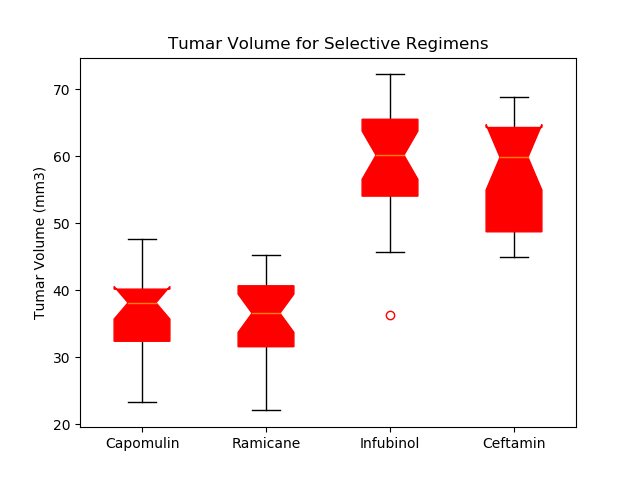

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# 
# merging all the data...
boxplot_data = [capomulin, ramicane, infubinol, ceftamin]
# boxplot_data
fig = plt.figure()
c = "red"
plt.boxplot(boxplot_data, labels=promising_regimens, notch=True, patch_artist=True, 
            boxprops=dict(facecolor=c, color=c), flierprops=dict(color=c, markeredgecolor=c))

plt.title("Tumar Volume for Selective Regimens")
plt.ylabel("Tumar Volume (mm3)")
# plt.ylim(0, 72+8)
plt.show()

## Line and scatter plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#
#   Filtering required data related to Capomulin Regimen....
#
capomulin_data = combined_data_df[['Drug Regimen','Mouse ID', 'Timepoint','Tumor Volume (mm3)']]
capomulin_data = capomulin_data.loc[capomulin_data["Drug Regimen"] == 'Capomulin']
org_capomulin_data = capomulin_data[['Mouse ID', 'Timepoint','Tumor Volume (mm3)']]
# org_capomulin_data

In [17]:
# # Get an input from the user to search and display line plot...
# #
# mid = input("Input Mouse ID for the mouse treated with Capomulin: ") --- hanging the computer...
#
#   selecting a mouse .... s185
#
mid = 's185'
result = capomulin_data.loc[capomulin_data["Mouse ID"] == mid]
# result

<IPython.core.display.Javascript object>


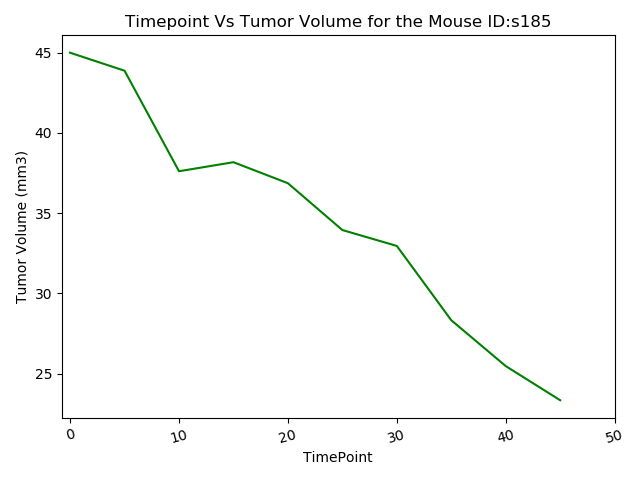

In [18]:
#  Displaying line plot of time point versus tumor volume for a mouse treated with Capomulin
#
fig = plt.figure()
plt.plot(result.Timepoint, result['Tumor Volume (mm3)'], color='green')
plt.xticks(rotation=15)
plt.xlabel('TimePoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-0.75, result['Timepoint'].max()+5)
plt.title('Timepoint Vs Tumor Volume for the Mouse ID:'+mid)
plt.tight_layout()
plt.show()

In [19]:
# collecting data realted to weight and tumor volume for Capomulin regimen
capomulin_wgdata = combined_data_df[['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)']]
capomulin_wgdata
capomulin_wgdata = capomulin_wgdata.loc[capomulin_wgdata["Drug Regimen"]== 'Capomulin']
capomulin_wgdata
capomulin_wggrp = capomulin_wgdata.groupby(['Mouse ID','Weight (g)'])
capomulin_wggrp.head()
capomulin_avgtv = capomulin_wggrp['Tumor Volume (mm3)'].mean().reset_index(drop=0)
capomulin_avgtv['Weight (g)'] = capomulin_avgtv['Weight (g)'].astype(int)
# capomulin_avgtv.head()

<IPython.core.display.Javascript object>


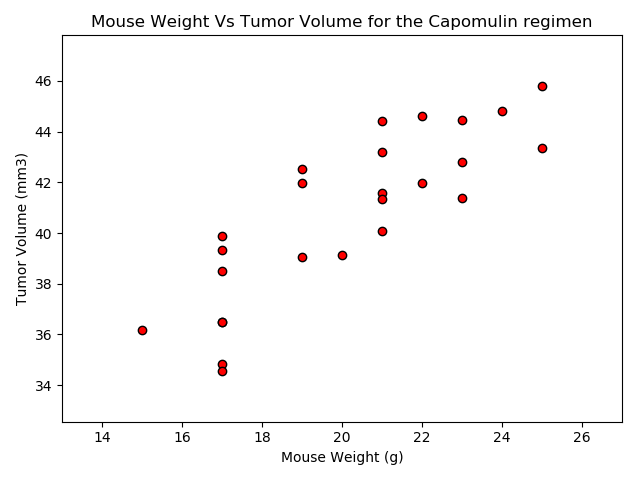

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig = plt.figure()

plt.scatter(capomulin_avgtv["Weight (g)"], capomulin_avgtv["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(capomulin_avgtv["Weight (g)"].min()-2, capomulin_avgtv["Weight (g)"].max()+2)
plt.ylim(capomulin_avgtv["Tumor Volume (mm3)"].min()-2, capomulin_avgtv["Tumor Volume (mm3)"].max()+2)
plt.title('Mouse Weight Vs Tumor Volume for the Capomulin regimen')
plt.show()
plt.tight_layout()

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#
#   Calculating the correlation coefficient
#
weight = capomulin_avgtv["Weight (g)"]
tv = capomulin_avgtv["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, tv)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [22]:
#    linear regression model
#   
slope, intercept, rvalue, pvalue, std_err = st.linregress(weight, tv)
regress_val = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq


'y = 0.95x + 21.55'

<IPython.core.display.Javascript object>


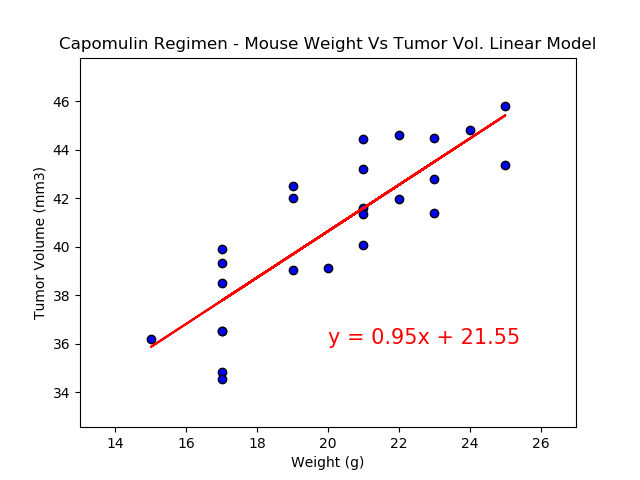

The r-squared is: 0.8419363424694718


In [23]:
#   Plot the linear model on top of scatter plot 
fig = plt.figure()
plt.scatter(capomulin_avgtv["Weight (g)"], capomulin_avgtv["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(capomulin_avgtv["Weight (g)"].min()-2, capomulin_avgtv["Weight (g)"].max()+2)
plt.ylim(capomulin_avgtv["Tumor Volume (mm3)"].min()-2, capomulin_avgtv["Tumor Volume (mm3)"].max()+2)
plt.plot(weight,regress_val,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Capomulin Regimen - Mouse Weight Vs Tumor Vol. Linear Model')
print(f"The r-squared is: {rvalue}")
plt.show()